In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.cort_processor_backup import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from scipy.fft import fftshift

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
# neural = morbo1101.tdt_data[0]['neural']
# fs = morbo1101.tdt_data[0]['fs']
# filtered = filter_neural(neural, fs)
# clean_filtered = remove_artifacts(filtered, fs)
# tsn = np.linspace(0, neural.shape[0]/fs,neural.shape[0])
# morbo1101.process()

In [3]:
# seconds = 4
# tn = filtered.shape[0]/fs
# print(tn)

# tr = (morbo1101.data['rates'][0].shape[0]*50)/1000
# print(tr)
# fs_rates = 20
# nperseg_rates = int(seconds*fs_rates)
# nperseg_raw = int(seconds*fs)


In [4]:
# plt.rcParams["figure.figsize"] = (9,20)

In [5]:
# fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10))
# f, t, Sxx = signal.spectrogram(filtered[:,0], fs = fs, nperseg = nperseg_raw)
# f2, t2, Sxx2 = signal.spectrogram(morbo1101.data['rates'][0][:,0], fs = fs_rates, nperseg = nperseg_rates)


# ax0.pcolormesh(t, f, Sxx, cmap = 'terrain', shading='gouraud')
# ax0.set_ylabel('Frequency [Hz]')
# ax0.set_xlabel('Time [sec]')
# ax0.set_ylim([0,10])
# ax0.set_xlim([0,250])
# ax0.set_title('filtered neural data')

# ax1.pcolormesh(t2, f2, Sxx2, cmap = 'terrain', shading='gouraud')
# ax1.set_ylim([0,10])
# ax1.set_xlim([0,250])
# ax1.set_ylabel('Frequency [Hz]')
# ax1.set_xlabel('Time [sec]')
# ax1.set_title('spike rates')


In [6]:
# morbo1101.data['rates'][0][:,0].shape

In [7]:
meepoinj = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-results/injured/meepo')
neural_mi = meepoinj.tdt_data[0]['neural']
fs_mi = meepoinj.tdt_data[0]['fs']
filtered_mi = filter_neural(neural_mi, fs_mi)
meepoinj.process()

read from t=0s to t=246.43s
read from t=0s to t=298.5s
read from t=0s to t=307.79s


(array([[100.,  60., 100., ..., 100.,  60.,  60.],
        [  0.,  20.,  60., ...,  60.,  20.,  20.],
        [ 20.,  20.,   0., ...,  20.,   0.,  40.],
        ...,
        [ 40.,  20.,  60., ...,  60.,  20.,  20.],
        [ 20.,  20.,  40., ...,  40.,  20.,  20.],
        [  0.,  20.,   0., ...,  20.,   0.,  20.]]),
 array([[109.61510904, 136.13844115,  73.68991702, ...,  95.51916324,
          74.43427283, 131.06185055],
        [ 64.63222995, 157.46447863,  29.11347937, ...,  81.79500459,
          81.47153276, 125.61301935],
        [ 66.75337913, 147.81148429,  40.72830632, ...,  84.86469405,
          77.02320972, 128.05634423],
        ...,
        [147.82079368,  25.61042229,  82.84022787, ...,  75.13343543,
          72.65667414, 112.82547221],
        [137.37859075,  30.61207124,  84.00754449, ...,  77.8951223 ,
          74.13982917, 113.19251599],
        [154.36928548,  22.32741346,  82.10774145, ...,  73.4612481 ,
          71.04178628, 113.53987404]]))

In [9]:
meepo = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-results/intact/meepo')
neural_m = meepo.tdt_data[0]['neural']
fs_m = meepoinj.tdt_data[0]['fs']
filtered_m = filter_neural(neural_m, fs_m)
meepo.process()

read from t=0s to t=335.56s
read from t=0s to t=331.07s


(array([[260., 240., 320., ..., 260., 240., 400.],
        [140., 160., 240., ..., 200., 260., 320.],
        [240., 160., 260., ..., 300., 340., 360.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([[ 87.53014765, 105.95709153,  82.30196477, ..., 118.6659095 ,
          72.12184636, 134.37832971],
        [120.1643617 , 140.83417902,  96.90379151, ..., 115.30431762,
          72.81806523, 113.99756719],
        [ 75.20616618, 141.68182692, 112.87674651, ..., 116.21479499,
          73.9711121 , 113.85877659],
        ...,
        [ 36.70842071,  74.35275219,  92.17202183, ...,  61.21321494,
          91.12103294, 116.35417009],
        [ 40.62371287,  76.44890662,  95.59300312, ...,  67.99697904,
          92.68460072, 116.20338837],
        [ 34.62948975,  73.47818287,  90.12039154, ...,  54.56861122,
          89.27167387, 114.76575265]]))

In [10]:
seconds = 4
fs_rates = 20
nperseg_rates = int(seconds*fs_rates)
nperseg_raw = int(seconds*fs)

Text(0.5, 0.98, 'meepo spike rate spectrogram')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
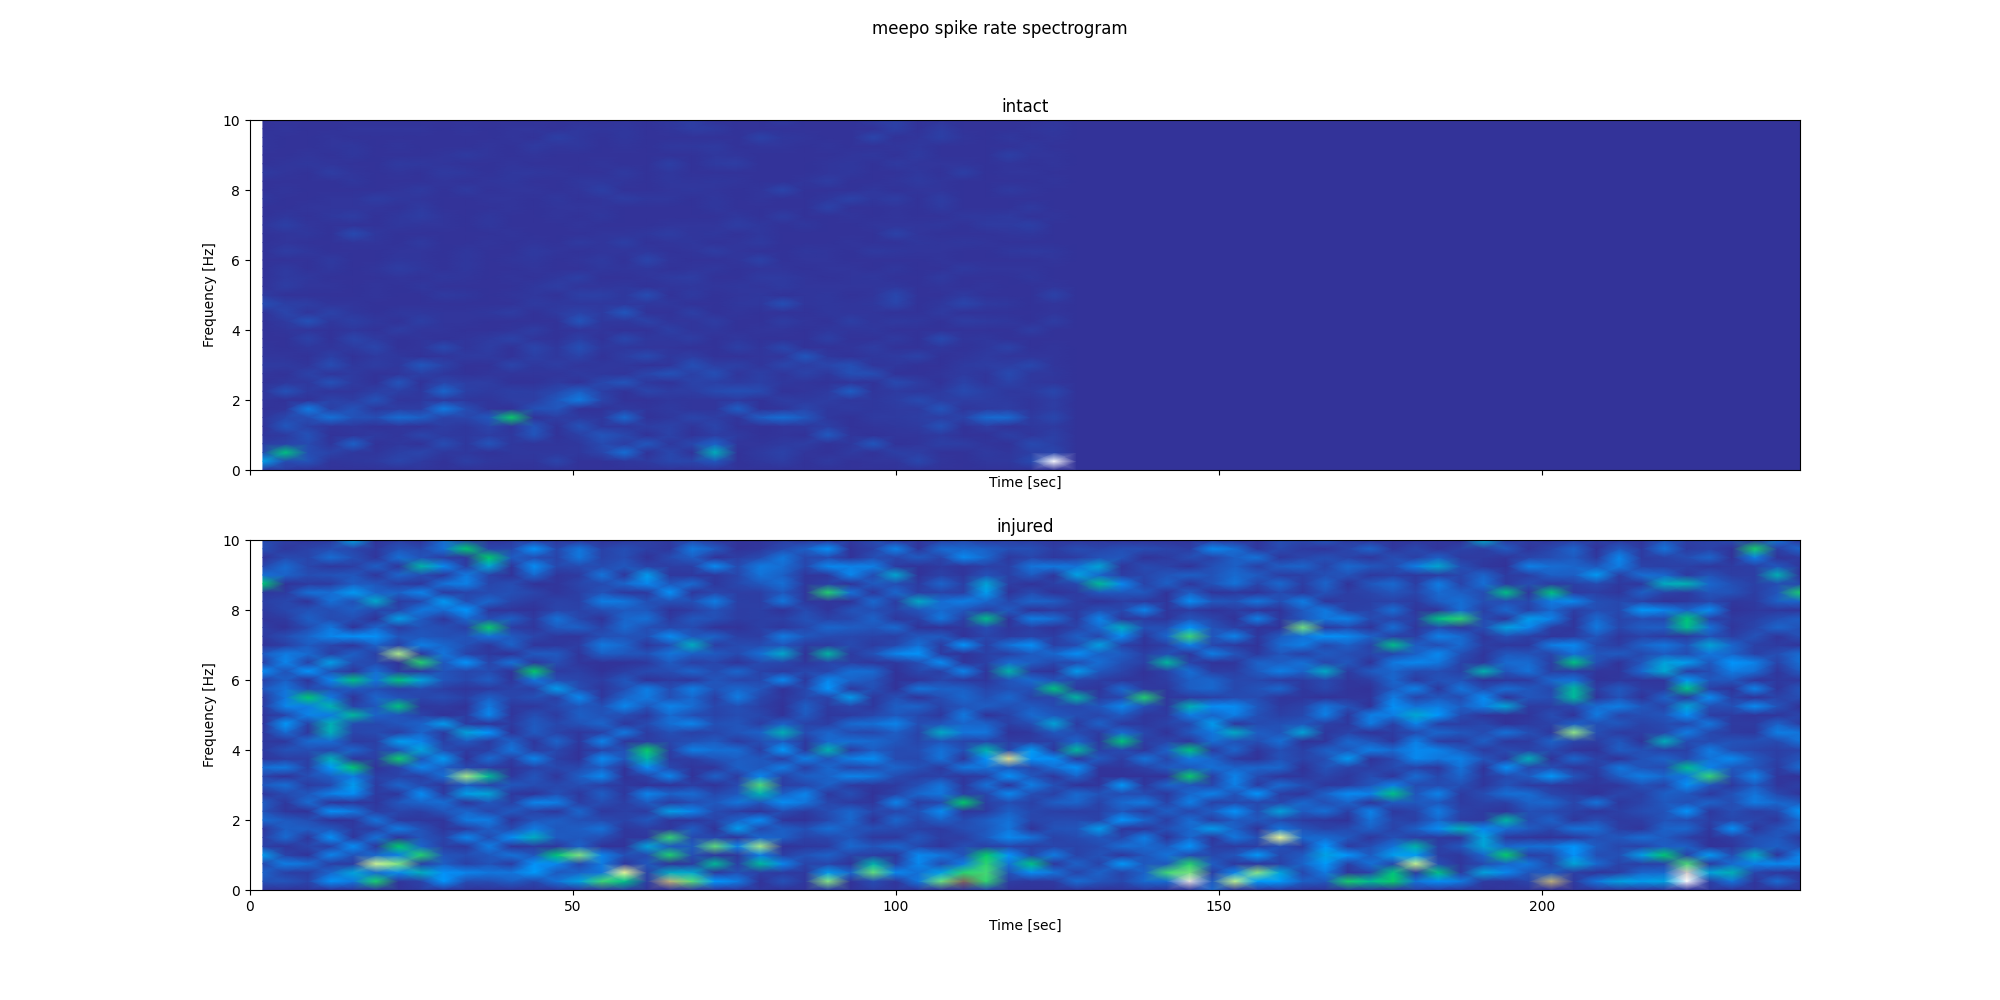

In [18]:
fig3, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10), sharex=True)
f_r, t_r, Sxx_r = signal.spectrogram(meepo.data['rates'][1][:,19], fs = fs_rates, nperseg = nperseg_rates)#, noverlap = nperseg_rates // 3)
f2_r, t2_r, Sxx2_r = signal.spectrogram(meepoinj.data['rates'][1][:,19], fs = fs_rates, nperseg = nperseg_rates)#, noverlap = nperseg_rates // 3)

ax0.pcolormesh(t_r, f_r, Sxx_r, cmap = 'terrain', shading='gouraud')
ax0.set_ylabel('Frequency [Hz]')
ax0.set_xlabel('Time [sec]')
ax0.set_ylim([0,10])
ax0.set_xlim([0,240])
ax0.set_title('intact')

ax1.pcolormesh(t2_r, f2_r, Sxx2_r, cmap = 'terrain', shading='gouraud')
ax1.set_ylim([0,10])
ax1.set_xlim([0,240])
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title('injured')
plt.suptitle("meepo spike rate spectrogram")

In [20]:
print(fs)

24414.0625


Text(0.5, 0.98, 'meepo neural voltage spectrogram')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
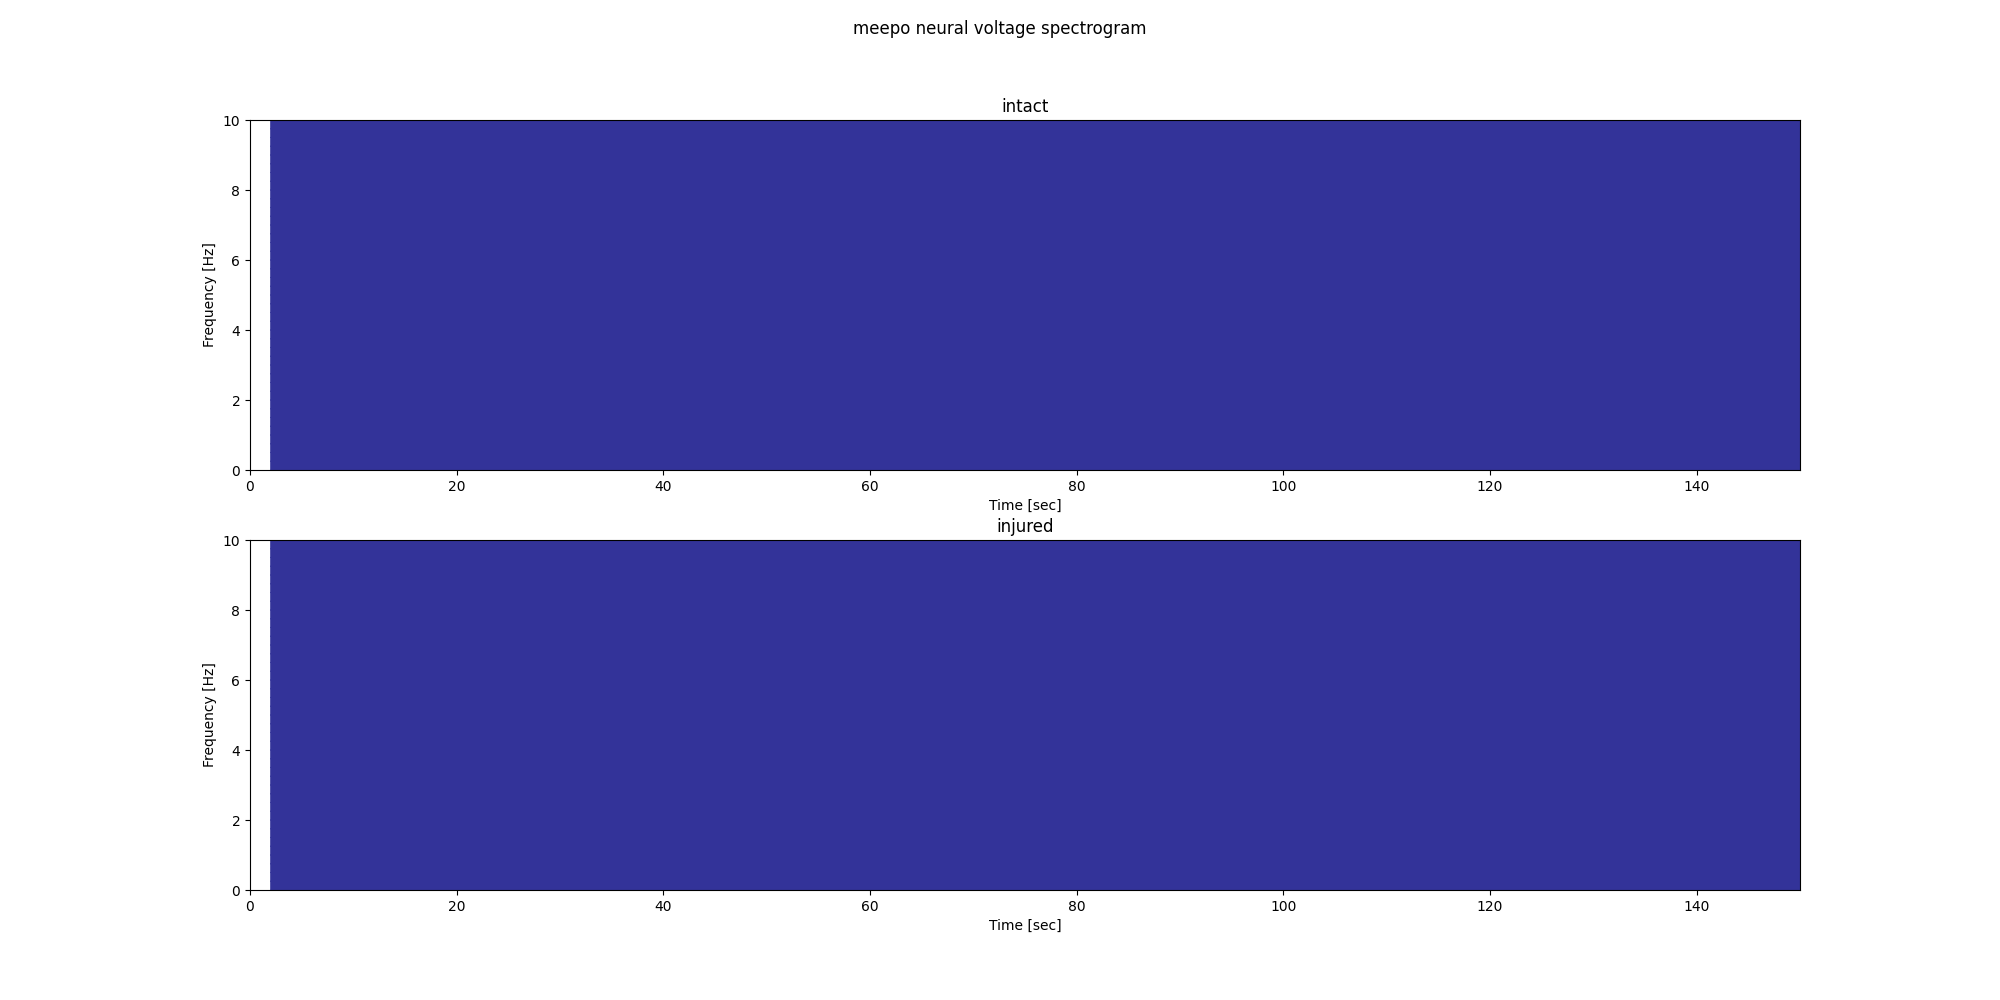

In [21]:
fig4, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10))
f_n, t_n, Sxx_n = signal.spectrogram(filtered_m[:,19], fs = fs, nperseg = nperseg_raw)
f2_n, t2_n, Sxx2_n = signal.spectrogram(filtered_mi[:,19], fs = fs, nperseg = nperseg_raw)

ax0.pcolormesh(t_n, f_n, Sxx_n, cmap = 'terrain', shading='gouraud')
ax0.set_ylabel('Frequency [Hz]')
ax0.set_xlabel('Time [sec]')
ax0.set_ylim([0,10])
ax0.set_xlim([0,150])
ax0.set_title('intact')

ax1.pcolormesh(t2_n, f2_n, Sxx2_n, cmap = 'terrain', shading='gouraud')
ax1.set_ylim([0,10])
ax1.set_xlim([0,150])
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title('injured')
plt.suptitle("meepo neural voltage spectrogram")

Text(0.5, 0.98, 'meepo neural voltage spectrogram')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
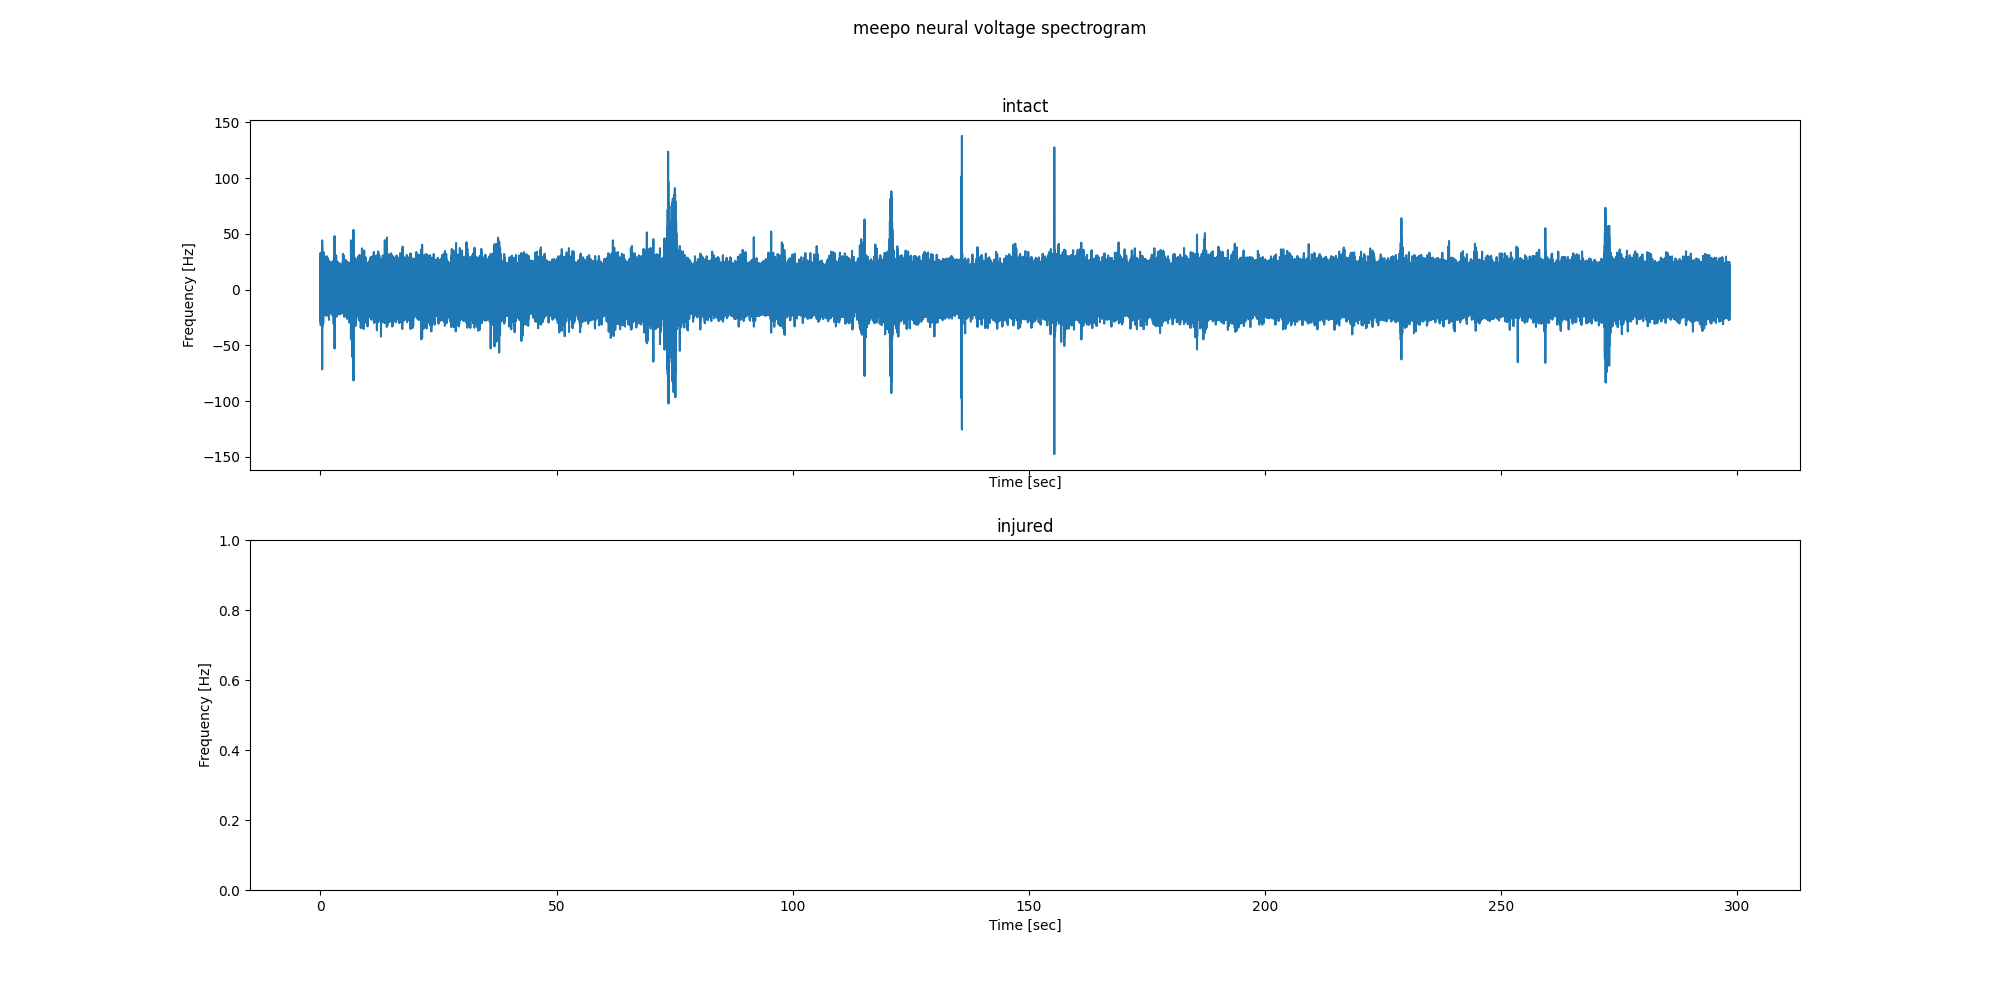

In [22]:
fig4, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10), sharex=True)

tsn_m = np.linspace(0, neural_m.shape[0]/fs,neural_m.shape[0])
tsn_mi = np.linspace(0, neural_mi.shape[0]/fs,neural_mi.shape[0])


ax0.plot(tsn_mi, filtered_mi[:,0])
ax0.set_ylabel('Frequency [Hz]')
ax0.set_xlabel('Time [sec]')
# ax0.set_ylim([0,10])
# ax0.set_xlim([0,240])
ax0.set_title('intact')

# ax1.pcolormesh(t2_n, f2_n, Sxx2_n, cmap = 'terrain', shading='gouraud')
# ax1.set_ylim([0,10])
# ax1.set_xlim([0,240])
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title('injured')
plt.suptitle("meepo neural voltage spectrogram")